<a href="https://colab.research.google.com/github/DGkurnia/discuss1/blob/main/mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tahap Awal**
# Nama : Derfansyah Guswiranata Kurnia
# email : weerakurnia@gmail.com
# Identitas dicoding : dgkurnia
# Domisili : Jakarta Timur

In [ ]:
#Inspeksi tensorflow
!pip install tensorflow==2.15
!!pip install keras==2.15
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from keras.callbacks import EarlyStopping as es


In [2]:
#Initiasi perpustakaan dasar
import numpy as np
from google.colab import files

#perpustakaan untuk inspeksi (Bagian matplotlib)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


#Lanjutan impor perpustakaan
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse

#eksekusi file
from google.colab import drive
drive.mount('/content/gdrive')
import zipfile,os
#lanjutan perpustakaan
import time

Mounted at /content/gdrive


In [3]:
#inspeksi
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs available: {gpus}")
else:
    print("No GPU available.")

No GPU available.


** Fasa upload berkas**

In [ ]:
#Persiapan filr dari github untuk ekstraksi
!wget -O janken.zip https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!ls
#ekstraksi File
!unzip janken.zip


In [5]:
# Inisiasi proyek
import os
#Daftar data
kertascol = '/content/rockpaperscissors/paper'
batucol = '/content/rockpaperscissors/rock'
guntingcol = '/content/rockpaperscissors/scissors'
colasli = '/content/rockpaperscissors/rps-cv-images' #Jalur dokumen asli

#deklarasi variable os deklarasi daftar
listdirkert = os.listdir(kertascol) #kertas
listdirbatu = os.listdir(batucol) #batu
listdirgunting = os.listdir(guntingcol) #gunting
listdirvalid = os.listdir(colasli) #validasi gambar

# persiapan data
print("total data gunting", len(listdirkert))
print("total data kertas", len(listdirbatu))
print("total data batu", len(listdirgunting))
print("total data validasi", len(listdirvalid))

total data gunting 712
total data kertas 726
total data batu 750
total data validasi 4


**Eksekusi Awal**

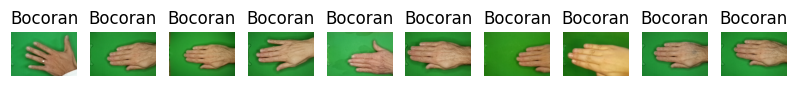

In [6]:
#Identifikasi gambar tahap awal
baris = 10
kolom = 10

#pembuatan file file gambar kertas untuk lima jenis file gambar berbeda
filegmb = [a for a in listdirkert if a.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
#intip 10 gambar pertama (ilustrasi grafik)
plt.figure(figsize=(10, 10))
#iterasi 10 gambar pertama (variable bocoran)
bocoran = enumerate(filegmb[:10])
#iterasi sesunguhnya
for a, filegmb in bocoran :
  jlrgmb = os.path.join(kertascol, filegmb)
  gmb = mpimg.imread(jlrgmb) #Untuk inspeksi gambar
  #Bagian sub grafik
  plt.subplot(baris, kolom, a+1)
  plt.imshow(gmb)
  plt.title('Bocoran')
  plt.axis('off')#mema
  #penampilan bocoran
plt.show()

**persiapan data latihan & data validasi**

In [9]:
#Tahap awal melalui Image Data Generator (IDG) bagian impor perpustakaan
import tensorflow as tf #Bagian tensor flow
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow.keras.optimizers import RMSprop as rmsp
import gc
#Modifikasi generator dengan normalisasi
img_latihan = idg(
    rescale=1./255,  # Normalisasi pixel ke rentang [0, 1]
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    samplewise_center=True,
    samplewise_std_normalization=True,
    validation_split=0.4  # Nilai validasi adalah 40 persen
)
img_val = idg(
    rescale=1./255,  # Normalisasi pixel ke rentang [0, 1]
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    samplewise_center=True,
    samplewise_std_normalization=True,
    validation_split=0.4  # Nilai validasi adalah 40 persen
)


In [10]:
#Fasa latihan dengan imagedatagenerator (Eksekusi sesi latihan)
seksi_latihan = img_latihan.flow_from_directory(
    colasli,
    target_size=(150, 150), #ukuran 150*150
    batch_size=32, seed=50,
    class_mode='categorical',
    subset='training',
    shuffle=True
)
#konstruksi validasi (latihan)
seksi_validasi = img_val.flow_from_directory(
    colasli,
    target_size=(150, 150),
    batch_size=32, seed=50,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)
#eksekusi generator
gc.collect()
#lanjut ke tahap selanjutmya

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


0

**Fasa dua**

In [ ]:
#Persiapan perpustakaan
from tensorflow.keras import layers, models
from tensorflow.keras.layers import ReLU
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

# Penetapan ukuran
lbr_gmb = 150
tgi_gmb = 150  # Lebar dan tinggi

kerasmod = tf.keras.models.Sequential([
    # Layer 32 with ReLU
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='valid',
                           input_shape=(lbr_gmb, tgi_gmb, 3)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Layer 64 with ReLU
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='valid'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Layer 128 with ReLU
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='valid'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Layer 256 with ReLU
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='valid'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    #Layer 512 with ReLU
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='valid'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Flatten the output before feeding into dense layers
    tf.keras.layers.Flatten(),

    # Dropout for regularization
    tf.keras.layers.Dropout(0.5),

    # Fully connected layer with ReLU
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dense(256),
    tf.keras.layers.ReLU(),

    # Output layer for classification (assuming three classes)
    tf.keras.layers.Dense(3, activation='softmax')
])

# Summary of the model
kerasmod.summary()

**Bagian tiga**
##Kompilasi dan Penyesuaian
###Komposisi
- a. persiapan laju pembelajaran
- b. penyesuaian

In [32]:
#Persiapan laju penyesuaian (Deklarasi laju)
jadwal = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000, decay_rate=0.95,
    staircase=True
)
#Deklarasi optimasi
jadopti = tf.keras.optimizers.Adam(learning_rate=jadwal) #Jadwal optimasi
#Pemanggilan kembali tensor
pangiltensor = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)
escallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights=True) #kesabaran inspeksi
mccallback = tf.keras.callbacks.ModelCheckpoint(filepath='model_best.keras', monitor='val_accuracy', save_best_only=True) #model checkpoint callback

In [33]:
#Perpustakaan kompilasi
from keras.losses import CategoricalFocalCrossentropy as catfoscent
from keras.metrics import Precision, Recall
# Eksekusi Kompilasi dan penyesuaian (kompilasi).
alpha_value = 0.25
gamma_value = 2.00
focal_loss = catfoscent(alpha=alpha_value, gamma=gamma_value)


In [36]:
#Kelas 'Dataset Kustom' dan Dinamisasi epoch  (Definisi hasil kelas (adjust this according to your dataset))
num_classes = 3  # Example value, replace with actual number of classes

# Kelas 'Dataset Kustom' dan Dinamisasi epoch
class CustomDataset(tf.data.Dataset):
    def __init__(self, data_gen, batch_size=25):
        super().__init__()
        self.data_gen = data_gen
        self.batch_size = batch_size
        self.dataset = None  # Diinisiasikan ke awal

    def _as_variant_tensor(self):
        return self.dataset._variant_tensor

    @property
    def element_spec(self):
        return (tf.TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32),
                tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32))

    def preprocess(self):
        self.dataset = tf.data.Dataset.from_generator(
            lambda: self.data_gen(),
            output_signature=(tf.TensorSpec(shape=(150, 150, 3), dtype=tf.float32),
                              tf.TensorSpec(shape=(num_classes,), dtype=tf.float32))
        )

        return (self.dataset
                .map(self._preprocess_function)
                .shuffle(buffer_size=1000)
                .batch(self.batch_size)
                .repeat())  # Pengulangan setiap batch

    def _preprocess_function(self, image, label):
        image = tf.image.resize(image, [256, 256]) / 255.0
        return image, label

# Dinamisasi Parameter
EPOK = 25  # Number of epochs
batch_size = 25  # Definisi Epok

# Dinamisasi Epok
steps_per_epoch = len(seksi_latihan) // batch_size
validation_steps = len(seksi_validasi) // batch_size

# Callback for dynamic epoch adjustment based on AUC
class DynamicEpochs(tf.keras.callbacks.Callback):
    def __init__(self, patience=5):
        super().__init__()
        self.patience = patience
        self.best_auc = 0
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current_auc = logs.get('val_auc')
        if current_auc is not None:
            if current_auc > self.best_auc:
                self.best_auc = current_auc
                self.wait = 0
            else:
                self.wait += 1

            if self.wait >= self.patience:
                print(f"Early stopping at epoch {epoch + 1} due to no improvement in AUC.")
                self.model.stop_training = True
  # Instantiate the callback
dynamic_epochs_callback = DynamicEpochs(patience=5)



In [37]:
# Eksekusi
kerasmod.compile(
    loss= focal_loss,
    optimizer=jadopti,
    metrics=['accuracy', Precision(), Recall(), tf.keras.metrics.AUC(name='auc')],
    run_eagerly=True
)

In [ ]:
#Persiapan Epoch (Pembuatan almanak gambar)
almanak = kerasmod.fit(
    seksi_latihan,  # Hal ini mewakili seksi latihan
    steps_per_epoch=steps_per_epoch,
    epochs=EPOK,
    batch_size=batch_size,
    validation_data = seksi_validasi,  # Changed to keyword argument
    validation_steps=validation_steps,
    callbacks=[pangiltensor, escallback, mccallback],
    verbose=5
)

#hasil (Inspeksi akurasi selama epok) di bawah
epokinsp = {'nilai akurasi': almanak.history['accuracy'],'nilai val_akurasi ': almanak.history['val_accuracy'],
    'lenyap ': almanak.history['loss'],'nilai val_lenyap': almanak.history['val_loss']}
#Nilai Epok
print(epokinsp)

**Bagian empat: Cek akurasi**

In [26]:
#Bagian 1: Eksodus evaluasi dengan kondisional di sejarah almanak
import numpy as np #Pembulatan <)
if 'val_loss' in almanak.history:  # Inspeksi nilai hilang selama inspeksi
    # Evaluasi model almanak di latohan dan validasi
    akurasi = np.round(kerasmod.evaluate(seksi_latihan),3)  # Hasil Akurasi
    hilang = np.round(kerasmod.evaluate(seksi_validasi),3)  # Hasil hilang
    # Mencetak hasil
    print("Total hilang:", hilang, "Total akurasi:", akurasi)
else:
    print("Tak perlu validasi :)")
#Hasil di sini

28/28 [==============================] - 23s 817ms/step - loss: 3.2642 - accuracy: 0.3249 - precision: 0.3249 - recall: 0.3249
Total hilang: [3.264 0.325 0.325 0.325] Total akurasi: [3.26  0.326 0.326 0.326]


**Inspeksi Visual Hasil Epok via Matplotlib**

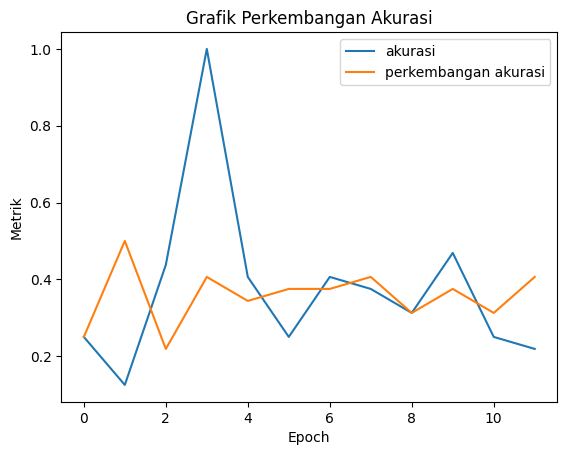

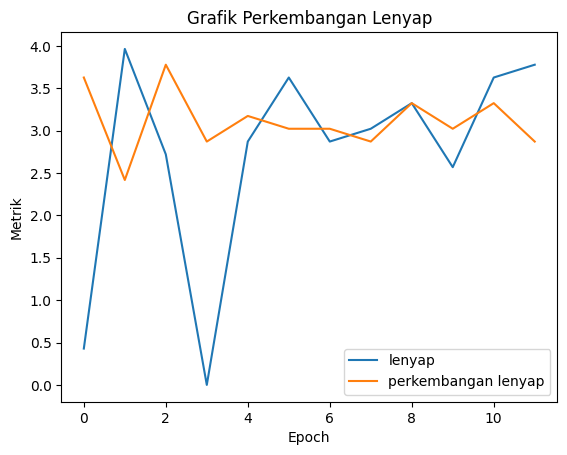

In [27]:
#hasil pemeriksaan akurasi dan lenyap di grafik bawah (Bagian impor sudah dilakukan)
plt.plot(almanak.history['accuracy'], label='akurasi')
plt.plot(almanak.history['val_accuracy'], label='perkembangan akurasi')
plt.title('Grafik Perkembangan Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Metrik')
plt.legend()
plt.show()
#Perkembangan lenyap di fasa asli dan validasi
plt.plot(almanak.history['loss'], label='lenyap')
plt.plot(almanak.history['val_loss'], label='perkembangan lenyap')
plt.title('Grafik Perkembangan Lenyap')
plt.xlabel('Epoch')
plt.ylabel('Metrik')
plt.legend()
plt.show()

In [ ]:
#Penyimpanan model
kerasmod.save('danxhmodelv1,3.h5')

**Bagian 5: Proses sebenarnya

In [ ]:
#Bagian awal
mdjadi = tf.keras.models.load_model('danxhmodelv1,3.h5') #Hasil inspeksi model jasi
#print(mdjadi) pemeriksaan model

#Bagian eksekusi fungsi jadi
def predict_this (mdjadi) :
  hup = files.upload() #Hasil upload
  #print(hup) #Inspeksi hasil
  for fn in hup.keys():
    #A. Jalur unduhan file
    junduh = fn #persiapan
    gmbjadi = image.load_img(junduh, target_size=(lbr_gmb, tgi_gmb)) #memasukan gambar
    #print(gmbjadi) #Inspeksi gambar
    gmb_aray = image.img_to_array(gmbjadi) #konversi gambar
    #print(gmb_aray) #Inspeksi gambar dalam array
    gmb_aray = np.expand_dims(gmb_aray, axis=0) / 255.0 #pengisian array untuk hasil

    #Komposisi prediksi
    prediksi = mdjadi.predict(gmb_aray)
    #print(prediksi)
    nama_kelas = ['Rock', 'Paper', 'Scissors']
    #deklarasi argumen maksimal
    maxarg = np.argmax(prediksi)
    prediksi_kelas = nama_kelas[maxarg]
    #print(prediksi_kelas)

    #Bagian penampilan gambar dan prediksi
    plt.show(gmbjadi) #ilustrasi gambar jadi
    plt.title(f"Prediksi: {prediksi_kelas}")
    plt.axis('off')
    plt.show()
    #Bagian pengunduhan gambar
predict_this(mdjadi)